<a href="https://colab.research.google.com/github/ytkidanu/ImageProcessing/blob/main/Cleaning%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow tensorflow-datasets


In [2]:
import tensorflow_datasets as tfds

# Load the PlantVillage dataset
dataset, info = tfds.load('plant_village', with_info=True, as_supervised=True)
full_dataset = dataset['train']

# Split the dataset into training and testing datasets


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.ZEDO5Q_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [9]:
import matplotlib.pyplot as plt

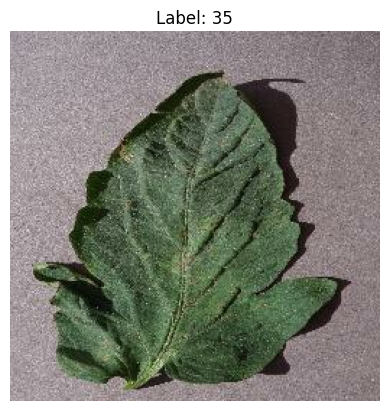

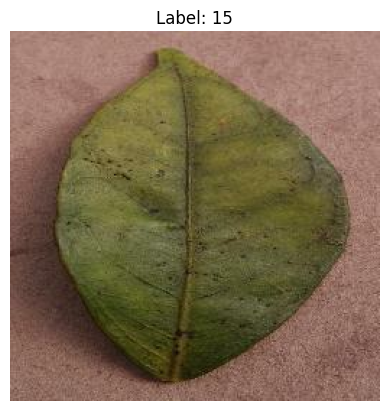

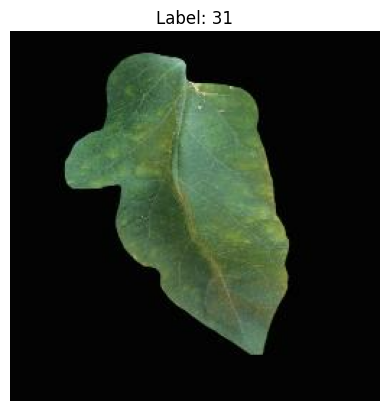

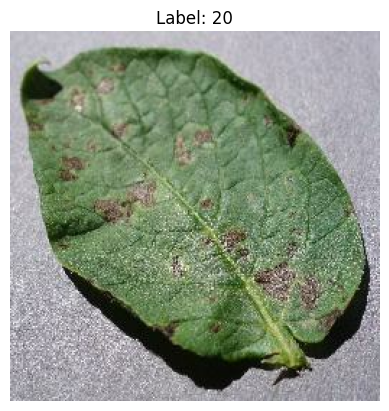

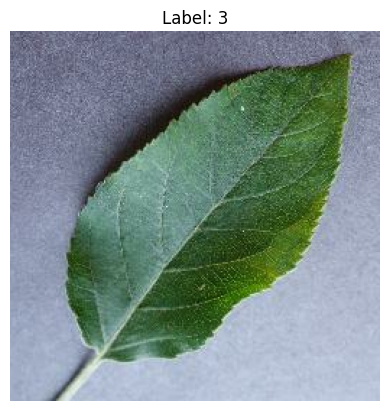

In [10]:
for image, label in full_dataset.take(5):
    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
    plt.show()

In [5]:
full_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load dataset with label info
dataset, info = tfds.load('plant_village', with_info=True, as_supervised=True)
train_ds = dataset['train']

# Get mapping from label names to integers
str2int = info.features['label'].str2int
int2str = info.features['label'].int2str

# Define Tomato class names
tomato_classes = [
    'Tomato_bacterial_spot',
    'Tomato_early_blight',
    'Tomato_healthy',
    'Tomato_late_blight',
    'Tomato_leaf_mold',
    'Tomato_septoria_leaf_spot',
    'Tomato_spider_mites_two-spotted_spider_mite',
    'Tomato_target_spot',
    'Tomato_mosaic_virus',
    'Tomato_yellow_leaf_curl_virus',
]

# Convert them to label IDs
tomato_label_ids = tf.constant([str2int(name) for name in tomato_classes])

# Filter function to keep only tomato images
def is_tomato(image, label):
    return tf.reduce_any(tf.equal(label, tomato_label_ids))

# Apply filter
tomato_ds = train_ds.filter(is_tomato)

In [ ]:
# train_ds  = dataset['train']
# count(train_ds)
# test_ds = dataset['test']
# builder = tfds.builder('my_dataset')
# builder.info.splits['train'].num_examples  # 10_000
# builder.info.splits['train[:75%]'].num_examples  # 7_500 (also works with slices)
# builder.info.splits.keys()  # ['train', 'test']

# import tensorflow as tf
# import tensorflow_datasets as tfds

# builder = tfds.builder("plant_village")
# builder.download_and_prepare()
# ds_info = builder.info




In [ ]:
# for image, label in builder.take(3):  # Take the first 3 samples
#     print("Image shape:", image.shape)
#     print("Label:", label.numpy())

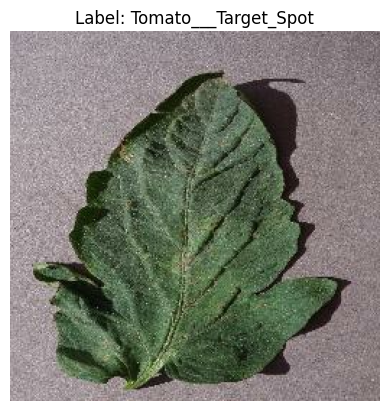

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

for i, (image, label) in enumerate(full_dataset.take(1)):  # Take the first 6 samples
    # Display image
    label_name = info.features['label'].int2str(label.numpy())
    plt.subplot(1, 1, i + 1)  # 1 row, 6 columns, current subplot
    plt.imshow(image.numpy())  # Convert tensor to numpy array for plotting
    plt.title(f"Label: {label_name}")  # Display the label as title
    plt.axis("off")  # Hide axes


# Show the plot
plt.show()



In [ ]:
plt.show()

# Collect all labels from the dataset
labels = [label for _, label in full_dataset]

# Convert the label indices to their corresponding label names
label_names = [info.features['label'].int2str(label) for label in labels]

label_counts = pd.Series(label_names).value_counts()
df = pd.DataFrame({'Labels': label_counts.index, 'Counts': label_counts.values})

print(df)

                                           Labels  Counts
0        Orange___Haunglongbing_(Citrus_greening)    5507
1          Tomato___Tomato_Yellow_Leaf_Curl_Virus    5357
2                               Soybean___healthy    5090
3                          Peach___Bacterial_spot    2297
4                         Tomato___Bacterial_spot    2127
5                            Tomato___Late_blight    1908
6                         Squash___Powdery_mildew    1835
7                     Tomato___Septoria_leaf_spot    1771
8   Tomato___Spider_mites Two-spotted_spider_mite    1676
9                                 Apple___healthy    1645
10                               Tomato___healthy    1591
11                            Blueberry___healthy    1502
12                         Pepper,_bell___healthy    1477
13                           Tomato___Target_Spot    1404
14                   Grape___Esca_(Black_Measles)    1383
15                             Corn___Common_rust    1192
16            

In [ ]:
#seed = 0518
# Split the dataset into training and testing subsets
#(train_ds, test_ds) = tfds.load("plant_village", split=["train[:80%]", "train[80%:]"], as_supervised=True)
